In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn.model_selection import GridSearchCV

# Create three clasifiers
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=1)


param_grid = { 
    'n_estimators': [200, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

In [82]:
pima = pd.read_csv('https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/pimadiabetes.csv')

## Labels For Columns/Header
- preg::Number of times pregnant
- glu::Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- bp::Diastolic blood pressure (mm Hg)
- skin::Triceps skin fold thickness (mm)
- serun::2-Hour serum insulin (mu U/ml)
- bmi::Body mass index (weight in kg/(height in m)^2)
- ped::FunctionDiabetes pedigree function
- age::Age (years)
- type::Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 No DM, 1 has DM)

In [126]:
pima.head()

,npreg,glu,bp,skin,serum,bmi,ped,age,type
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [87]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   npreg   768 non-null    int64  
 1   glu     768 non-null    int64  
 2   bp      768 non-null    int64  
 3   skin    768 non-null    int64  
 4   serum   768 non-null    int64  
 5   bmi     768 non-null    float64
 6   ped     768 non-null    float64
 7   age     768 non-null    int64  
 8   type    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
# Check For Occurence of Class
pima.groupby('type').size()


type
0    500
1    268
dtype: int64

,npreg,glu,bp,skin,serum,bmi,ped,age,type
npreg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
ped,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
type,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


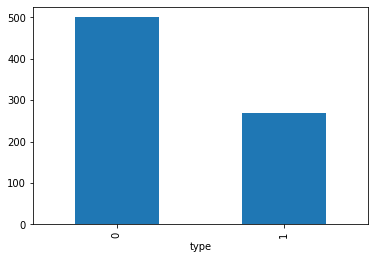

In [90]:
pima.groupby('type').size().plot(kind="bar")
pima.corr()

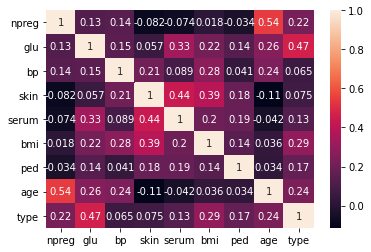

In [91]:
"""Generally, a value of r greater than 0.7 is considered a strong correlation. 
Anything between 0.5 and 0.7 is a moderate correlation, 
and anything less than 0.4 is considered a weak or no correlation"""
sns.heatmap(pima.corr(),annot=True)

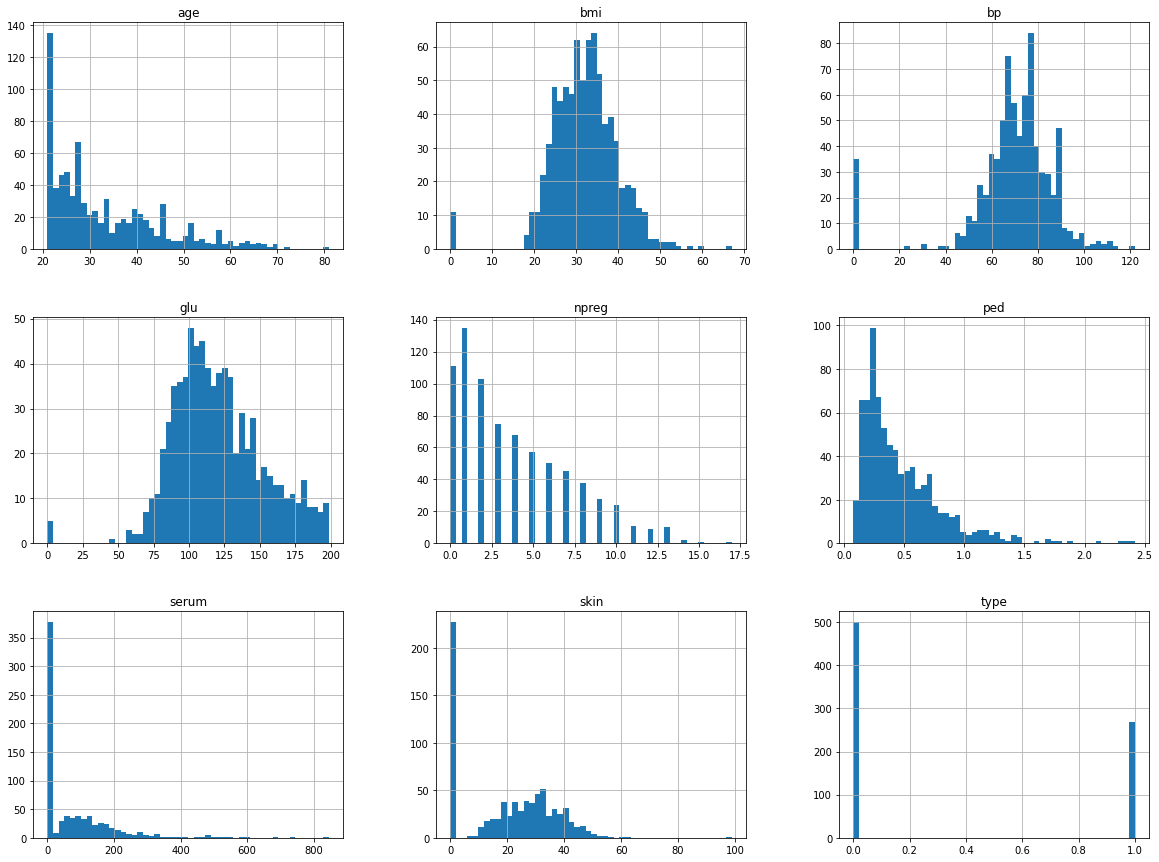

In [92]:
# Visualize all features
pima.hist(bins=50, figsize=(20, 15))
plt.show()


In [93]:
# Descriptive Analysis Transposed
pima.describe().T


,count,mean,std,min,25%,50%,75%,max
npreg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glu,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
ped,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
type,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [108]:
print(pima['bp'].median())
print(pima['bp'].mean())
print(pima['bmi'].median())
print(pima['serum'].median())
print(pima['glu'].median())
print(pima['skin'].median())

72.0
72.38671875
32.0
31.25
117.0
23.0


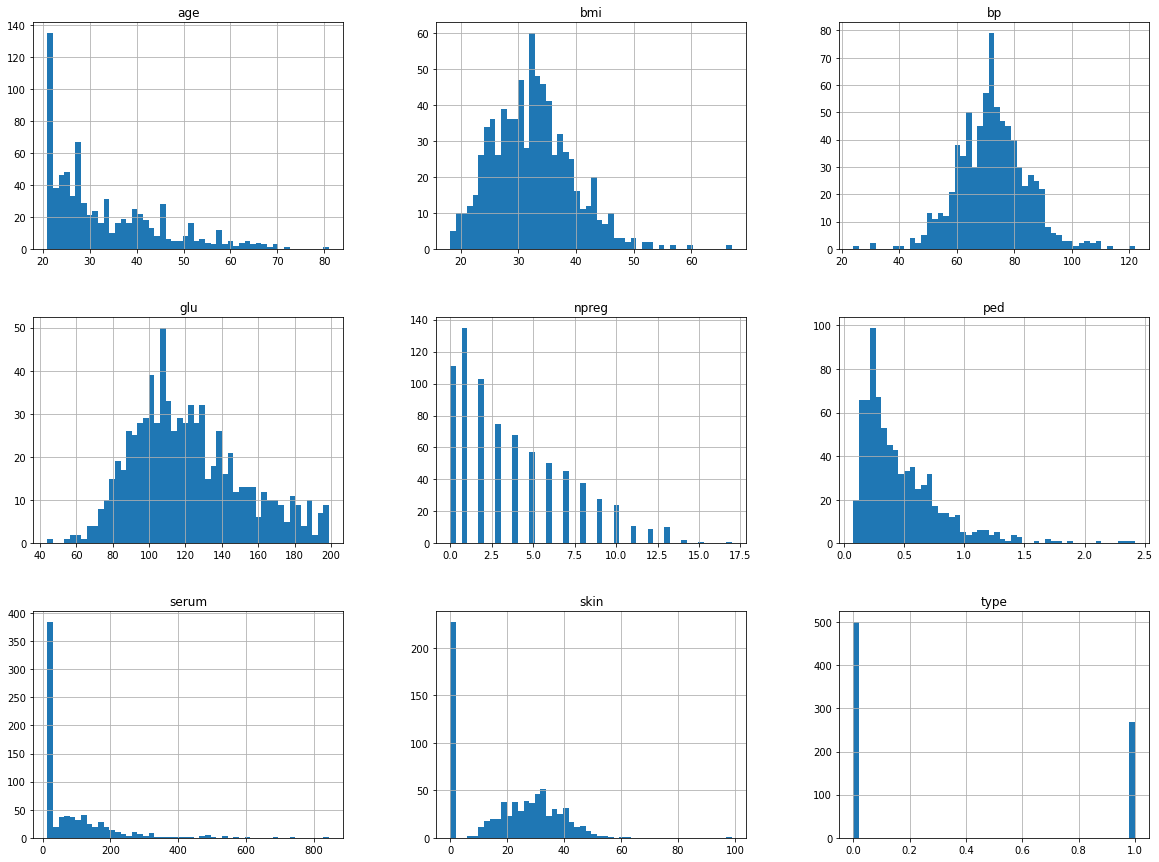

In [99]:
### Data Cleaning 
# Removing 0 sinces bp and bmi Cant be zero

# Replace 0 with Median not Mean
pima['bp'] = pima['bp'].replace(to_replace=0,value=pima['bp'].median())

# Replace 0 with Median not Mean
pima['bmi'] = pima['bmi'].replace(to_replace=0,value=pima['bmi'].median())


# Replace 0 with Median not Mean
pima['serum'] = pima['serum'].replace(to_replace=0,value=pima['serum'].median())


# Replace 0 with Median not Mean
pima['glu'] = pima['glu'].replace(to_replace=0,value=pima['glu'].median())

pima['skin'] = pima['skin'].fillna(pima['skin'].median())

pima.hist(bins=50, figsize=(20, 15))
plt.show()

In [100]:
X = pima.iloc[:,:8]
y = pima['type']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr.fit(X, y)

In [120]:
lr.score(X_train, y_train)*100

77.36156351791531

In [106]:
lr.score(X_test, y_test)*100

77.92207792207793

In [ ]:
rf.fit(X_train, y_train)

In [109]:
predicted = rf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)*100

77.92207792207793

In [115]:
print(X.columns)
print(rf.best_estimator_.feature_importances_*100)

Index(['npreg', 'glu', 'bp', 'skin', 'serum', 'bmi', 'ped', 'age'], dtype='object')
[ 9.10655007 32.12385934  5.92152385  4.63546757  6.0914661  16.32669673
 10.12895822 15.66547813]


## Save model

In [116]:
from joblib import dump, load

In [121]:
# Save into file
dump(lr, 'logit_trained.joblib') 

['logit_trained.joblib']

In [122]:
!ls

logit_trained.joblib  sample_data  trained_model.joblib


In [125]:
# Download from Google Colab
from google.colab import files
files.download('logit_trained.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
from sklearn.metrics import classification_report